In [51]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [52]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)

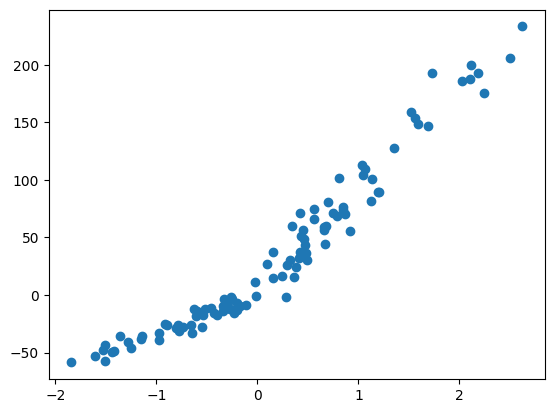

In [53]:
plt.scatter(x, y)

In [54]:
print(x.shape)
y = y.reshape((x.shape[0], 1))
print(y.shape)

(100, 1)
(100, 1)


In [55]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X[:5]

array([[ 2.28459027, -1.51148611,  1.        ],
       [ 1.85412626, -1.36166305,  1.        ],
       [ 0.21163924,  0.46004265,  1.        ],
       [ 2.33621489, -1.52846815,  1.        ],
       [ 0.49410561,  0.70292646,  1.        ]])

In [56]:
theta = np.random.randn(3, 1)
print(theta)

[[-0.25098784]
 [-0.54464945]
 [-0.0855171 ]]


# Modèle

In [57]:
def model(X_, theta_):
    return X_.dot(theta_)

In [58]:
model(X, theta)[:5]

array([[ 0.16430859],
       [ 0.19074877],
       [-0.38919795],
       [ 0.16060069],
       [-0.59238011]])

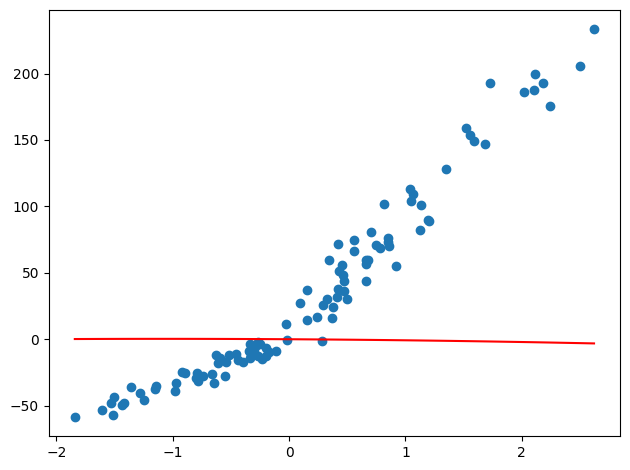

In [59]:
plt.scatter(x, y)
sns.lineplot(x=x[:, 0], y=model(X, theta)[:, 0], color="red")
plt.tight_layout()
plt.show()

# Fonction coût

In [60]:
def cost_function(X_, y_, theta_):
    m = len(y_)
    return 1/2*m + np.sum((model(X_, theta_) - y_)**2)

In [61]:
cost_function(X, y, theta)

np.float64(638441.2153861612)

# Gradient

In [62]:
def grad(X_, y_, theta_):
    m = len(y_)
    return 1/m * X_.transpose().dot(model(X_, theta_) - y_)

# Descente de gradient

In [63]:
def descent_grad(X_, y_, theta_, leaning_rate, n_iteration):
    cost_history_ = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta_ = theta_ - leaning_rate * grad(X_, y_, theta_)
        cost_history_[i] = cost_function(X_, y_, theta_)
    return theta_, cost_history_

# Entraînement du modèle

In [64]:
theta_final, cost_history = descent_grad(X, y, theta, leaning_rate=0.01, n_iteration=500)
theta_final

array([[12.13217777],
       [59.42032275],
       [11.7755001 ]])

In [65]:
predictions = model(X, theta_final)

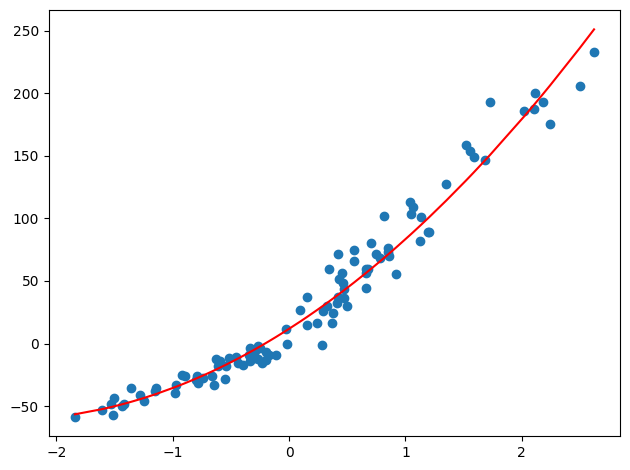

In [66]:
plt.scatter(x[:, 0], y)
sns.lineplot(x=x[:, 0], y=predictions[:, 0], color="red")
plt.tight_layout()
plt.show()

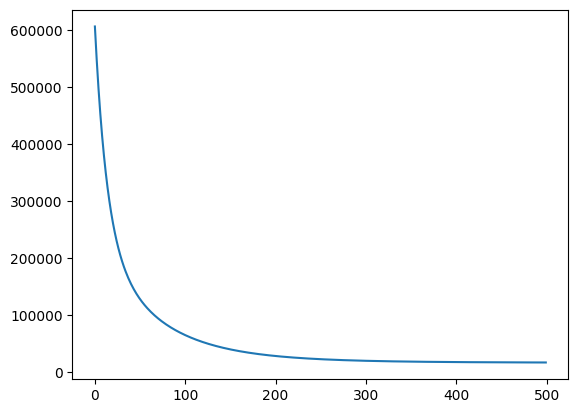

In [67]:
plt.plot(range(500), cost_history)

# Coéfficient de détermination R²

In [68]:
def coef_determination(y_, pred):
    u = np.sum((y_ - pred)**2)
    v = np.sum((y_ - y_.mean())**2)
    return 1 - u/v

In [69]:
coef_determination(y, predictions)

np.float64(0.9660505584147169)